Testing the difference between differend algorithms

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from utils.plot import *

Loading data

In [2]:
BASE_PATH = 'results/lenet_compres_50/'
SAVE_FILES = {
    'RND': 'test_RND_save.csv',
    'PSO': 'test_PSO_save.csv',
    'GA': 'test_GA_save.csv',
}

In [3]:
data = {
    'run': [],
    'RND': [],
    'PSO': [],
    'GA': [],
}

for dir in os.listdir(BASE_PATH):
    data['run'].append(dir)
    for key in SAVE_FILES.keys():
        save_df = pd.read_csv(os.path.join(BASE_PATH, dir, SAVE_FILES[key]))
        data[key].append(save_df['fitness'].max())

data = pd.DataFrame(data)
data

,run,RND,PSO,GA
0,run7,2.868828,2.769676,3.733112
1,run3,2.912878,3.886143,3.910135
2,run4,2.644139,3.624207,3.534596
3,run10,2.988090,3.148356,3.898353
4,run2,2.638403,3.886143,3.460122
5,run8,2.663327,4.040835,3.663619
6,run9,2.434501,3.951331,3.928149
7,run11,3.173005,2.780445,3.733802
8,run1,2.879781,3.116770,3.632210
9,run5,3.175640,4.000432,3.555084


Print graph

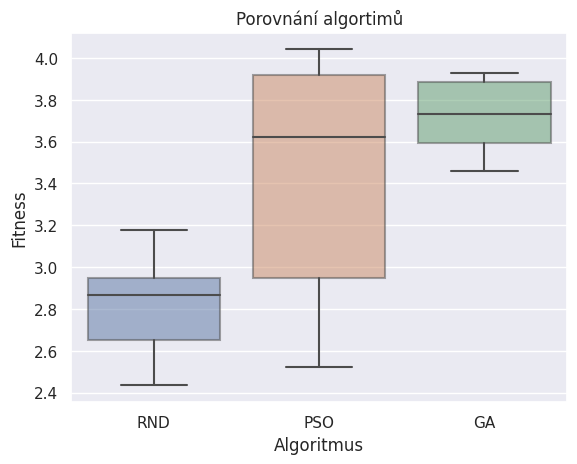

In [4]:
sns.set(style="darkgrid")
graph = sns.boxplot(data=data, boxprops=dict(alpha=0.5)) #  medianprops={"color": "coral"}
graph.set(xlabel = 'Algoritmus', ylabel='Fitness', title='Porovnání algortimů')
graph.get_figure().savefig('results/plots/box.pdf')

Showing performance graphs

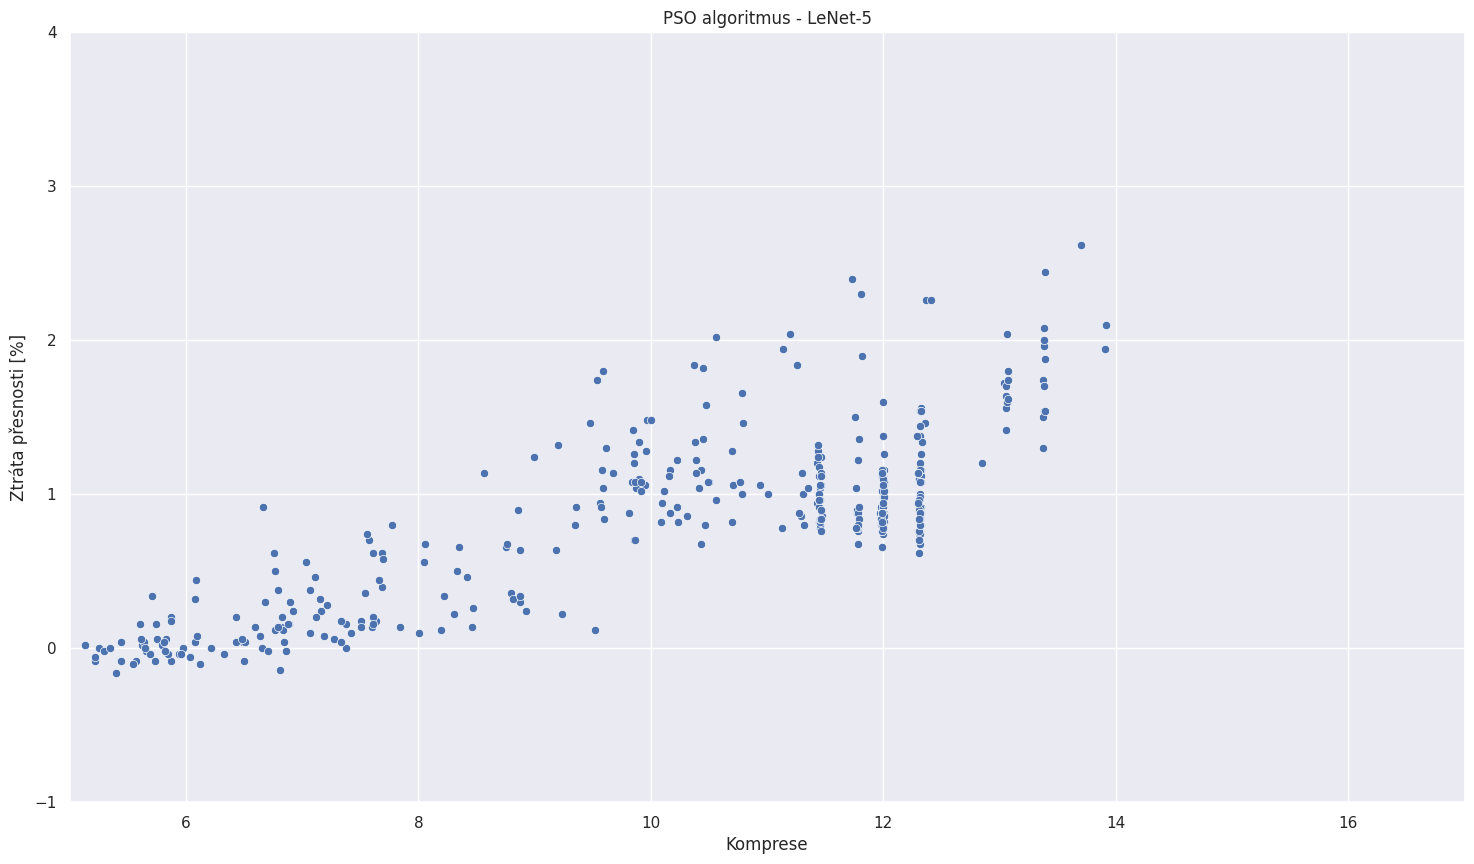

In [5]:
plt_data = pd.read_csv('results/lenet_compres_50/run8/test_PSO_save.csv')
plot_alcr(plt_data, False)
plt.title('PSO algoritmus - LeNet-5')
plt.xlabel('Komprese')
plt.ylabel('Ztráta přesnosti [%]')
plt.savefig('results/plots/scatter.pdf')

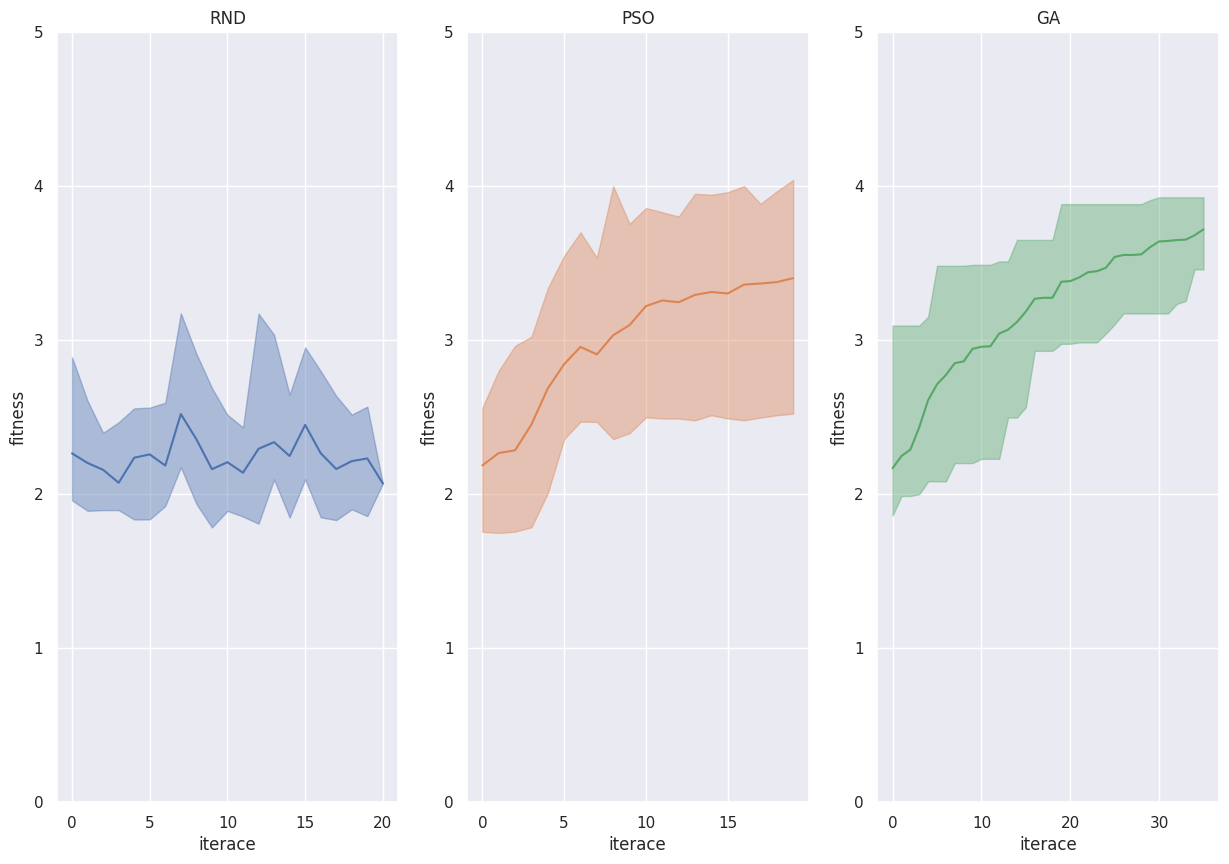

In [6]:
files = {
    'RND': [],
    'PSO': [],
    'GA': [],
}

for key in files.keys():
    for i in range(1, 12):
        files[key].append(f'results/lenet_compres_50/run{i}/test_{key}_save.csv')

plot_optimalization_progress(files)
plt.savefig('results/plots/line.pdf')